In [2]:
!pip install ipykernel jupyter
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pyyaml


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml

In [4]:
with open('/home/uzokmurod/Desktop/amaliyot/telco-churn/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

raw_data = config['data']['raw_data']
df = pd.read_csv(raw_data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

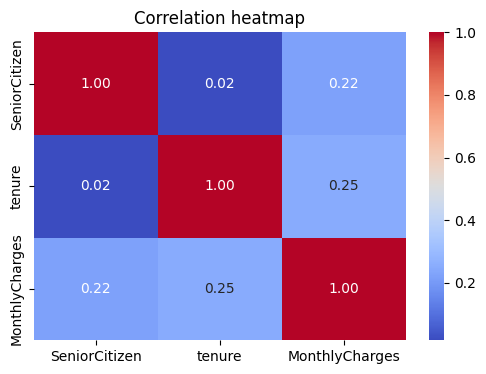

In [10]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(6,4))

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm" )
plt.title("Correlation heatmap")
plt.show()


In [11]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [12]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


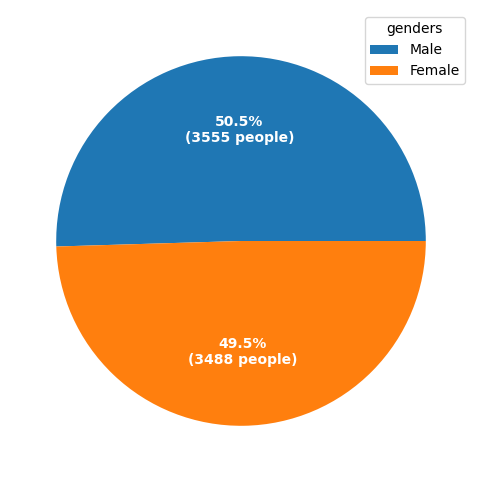

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))
data = df['gender'].value_counts()
def func(pct, all):
    absolute = int(np.round(pct/100.*np.sum(all)))
    return f"{pct:.1f}%\n({absolute:d} people)"

wedges, texts, autotexts = ax.pie(data.values, autopct=lambda pct:func(pct, data.values), textprops=dict(color="w"))

ax.legend(wedges, data.index, title='genders', loc=0)
plt.setp(autotexts, size=10, weight= 'bold')
plt.show()


In [21]:
l1 = [len(str(i).split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print(*l2)
df["TotalCharges"] = df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df.drop(columns='customerID', inplace=True, axis=1)

488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
num_col = df.select_dtypes(include="number").columns.to_list()
obj_cols = df.select_dtypes(include= ['object']).columns.tolist()


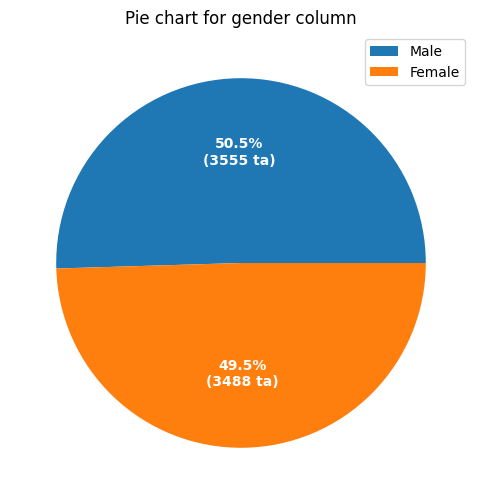

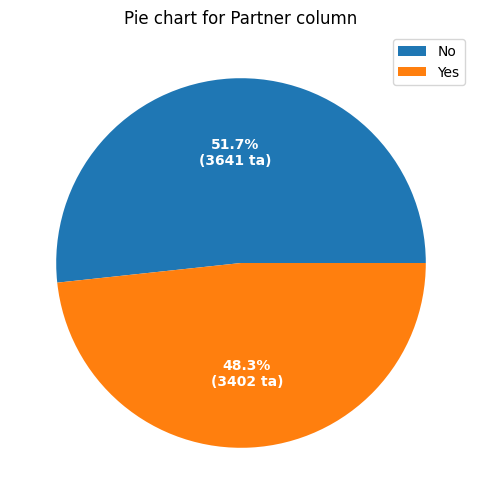

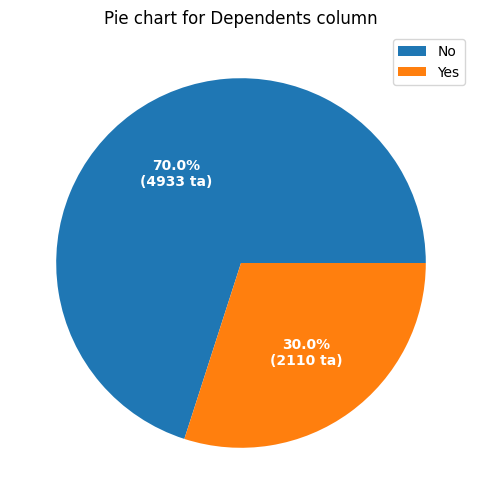

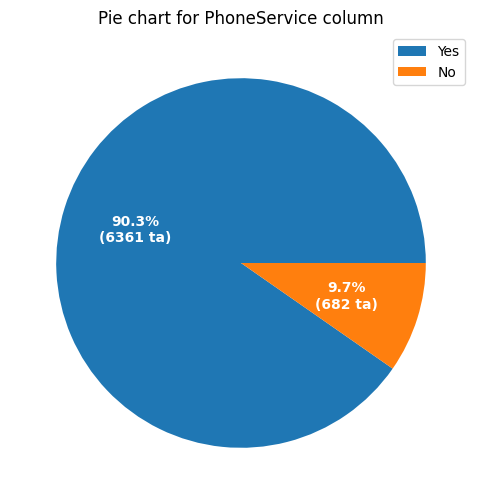

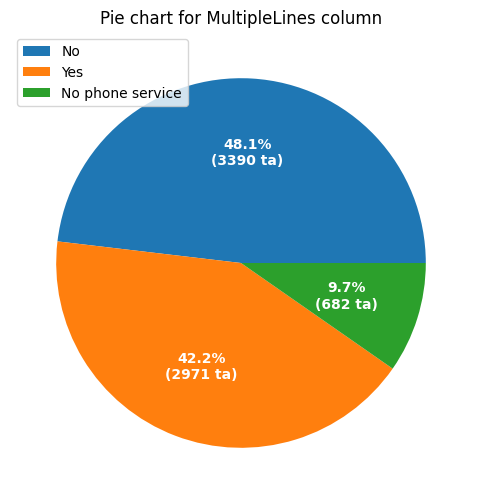

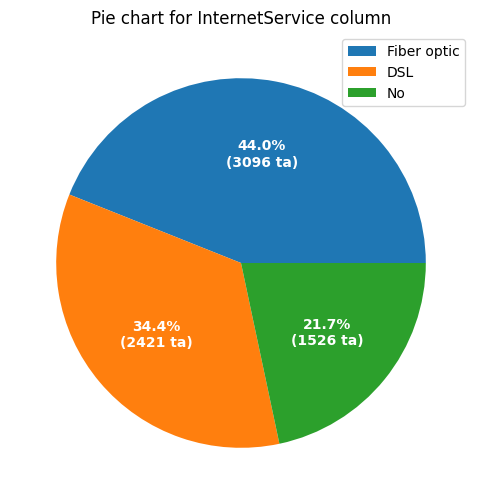

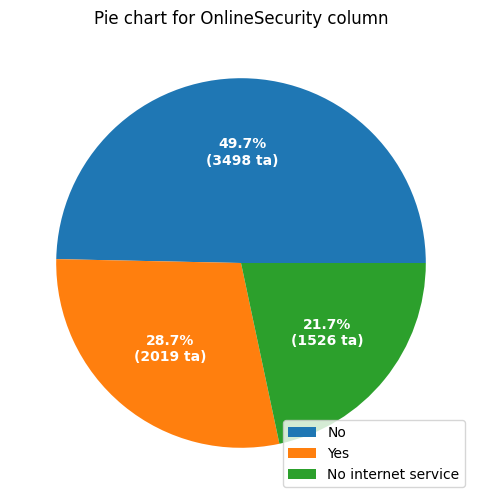

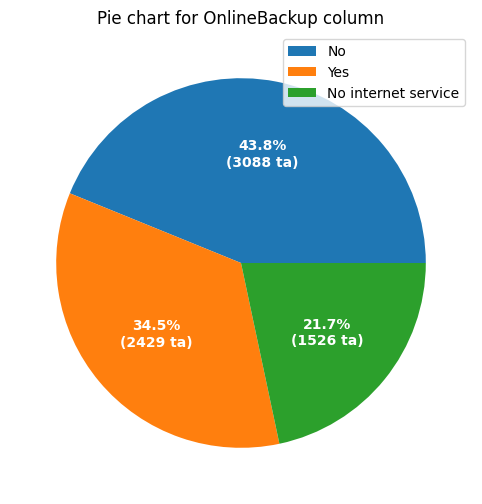

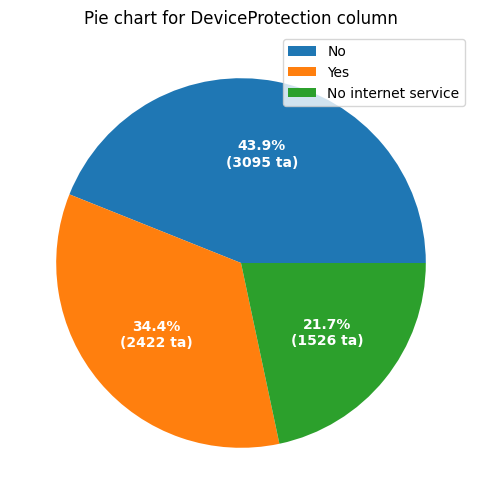

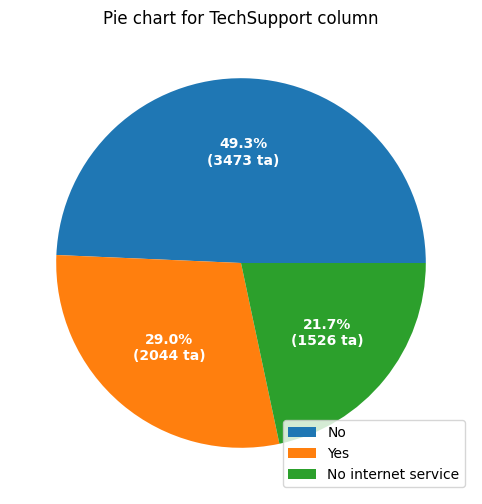

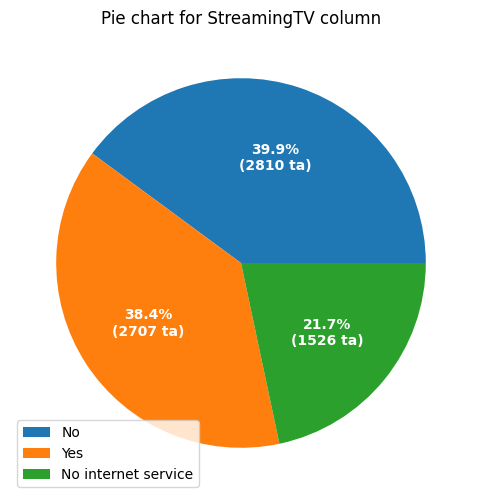

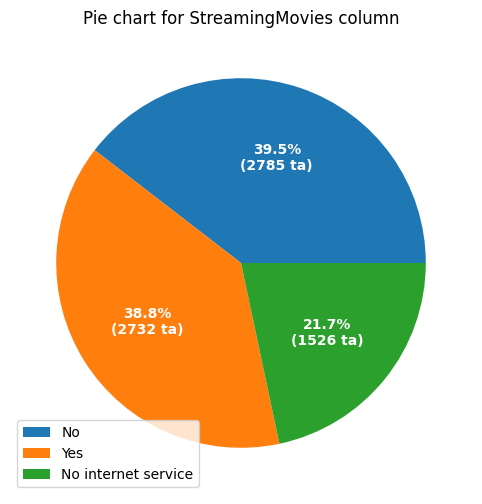

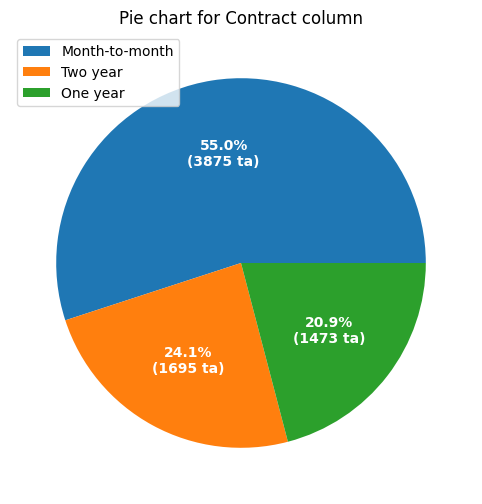

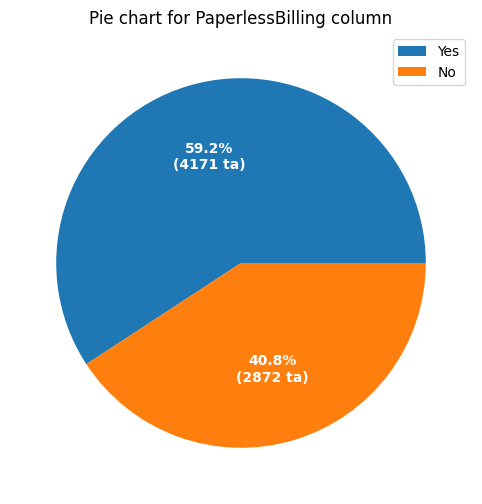

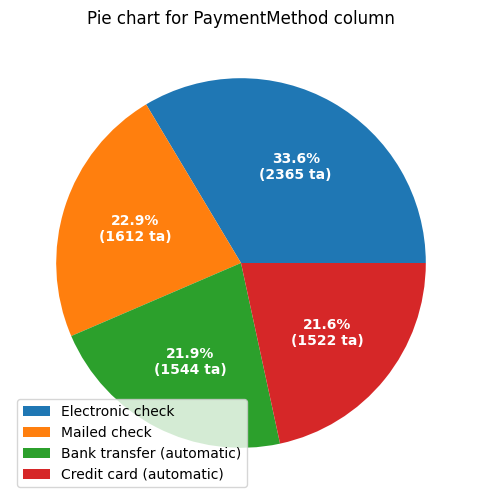

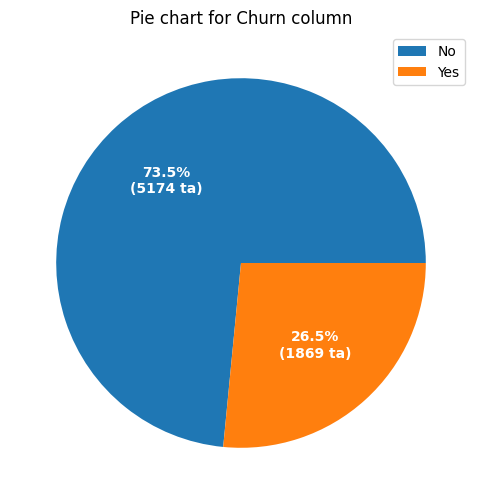

In [31]:
for i in obj_cols:
    data = df[i].value_counts()

    fig, ax = plt.subplots(figsize = (8,6), subplot_kw=dict(aspect='equal'))
    
    def func(pct, allvals):
        absolute = int(np.round(pct / 100. * np.sum(allvals)))
        return f"{pct:.1f}%\n({absolute} ta)"

        
    wedges, texts, autotexts = ax.pie(data.values, autopct=lambda pct: func(pct, data.values), textprops=dict(color = 'w'))
    
    ax.legend(wedges, data.index, loc=0)
    plt.setp(autotexts, size = 10, weight = 'bold')
    plt.title(f"Pie chart for {i} column")
    plt.show()

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
list = [0, 12, 24, 36, 48, 60, 72]

tenure = pd.cut(df['tenure'], list)
tenure

0        (0, 12]
1       (24, 36]
2        (0, 12]
3       (36, 48]
4        (0, 12]
          ...   
7038    (12, 24]
7039    (60, 72]
7040     (0, 12]
7041     (0, 12]
7042    (60, 72]
Name: tenure, Length: 7043, dtype: category
Categories (6, interval[int64, right]): [(0, 12] < (12, 24] < (24, 36] < (36, 48] < (48, 60] < (60, 72]]

In [40]:
churn_tenure = pd.DataFrame(tenure)

In [ ]:
churn_tenure['churn'] = df["Churn"]
churn_tenure

,tenure,churn
0,"(0, 12]",No
1,"(24, 36]",No
2,"(0, 12]",Yes
3,"(36, 48]",No
4,"(0, 12]",Yes
...,...,...
7038,"(12, 24]",No
7039,"(60, 72]",No
7040,"(0, 12]",No
7041,"(0, 12]",Yes


/tmp/ipykernel_27876/2264980089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = churn_tenure.groupby('tenure').value_counts().unstack()


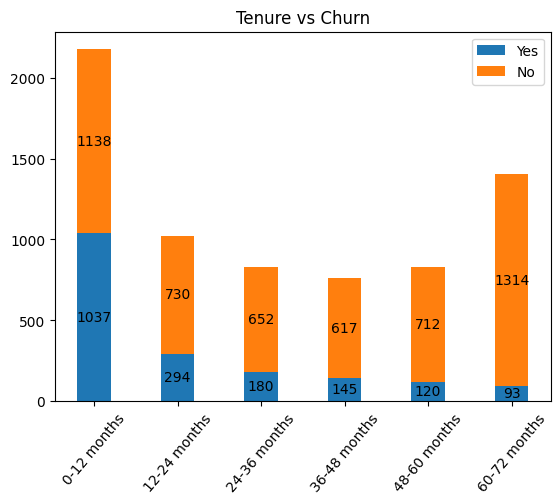

In [85]:
grouped = churn_tenure.groupby('tenure').value_counts().unstack()
grouped.columns.name = None

group1 = [i.left for i in grouped.index]
group2 = [i.right for i in grouped.index]
group = [f'{a}-{b} months' for a, b in zip(group1, group2)]
answer_counts = {
    'Yes':[grouped.loc[interval, 'Yes'] for interval in grouped.index],
    'No': [grouped.loc[interval, 'No'] for interval in grouped.index]
}
width = 0.4  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(6)

for answer, counts in answer_counts.items():
    p = ax.bar(group, counts, width, label=answer, bottom=bottom)
    bottom += counts

    ax.bar_label(p, label_type='center')

ax.set_title('Tenure vs Churn')
ax.legend()
plt.xticks(rotation=50)

plt.show()